In [1]:
%matplotlib inline

### Chapter 9 Graph and Visualization

In [181]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision=4, suppress=True)

In [10]:
data = np.arange(9)
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

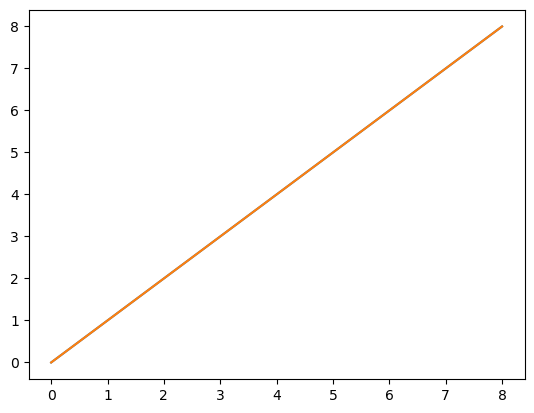

In [16]:
plt.plot(data)
plt.show()

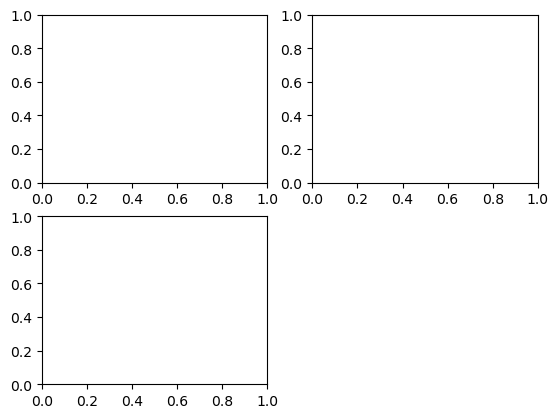

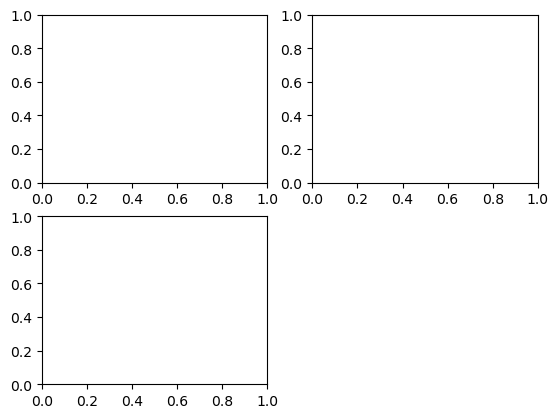

In [70]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
plt.show()

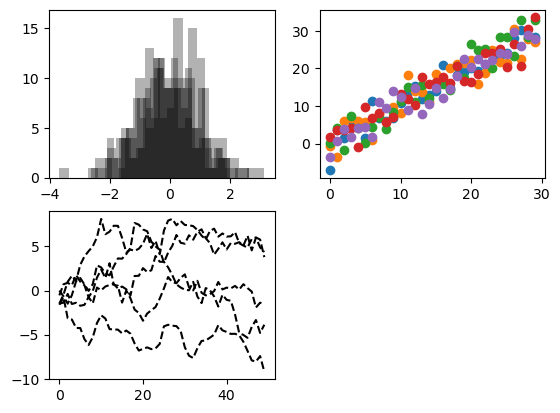

In [80]:
ax3.plot(np.random.standard_normal(50).cumsum(), color = "black",
         linestyle = "dashed")
ax1.hist(np.random.standard_normal(100),bins=20,color="black", alpha= 0.3)
ax2.scatter(np.arange(30),np.arange(30) + 3 * np.random.standard_normal(30))
fig

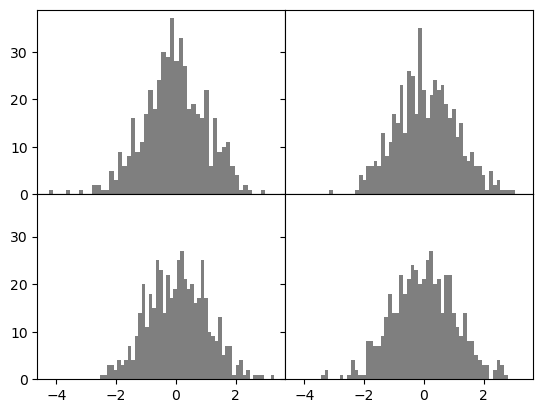

In [90]:
fig, axes = plt.subplots(2,2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.standard_normal(500), bins = 50,
                       color = "black", alpha=0.5)

fig.subplots_adjust(wspace=0, hspace=0)

fig

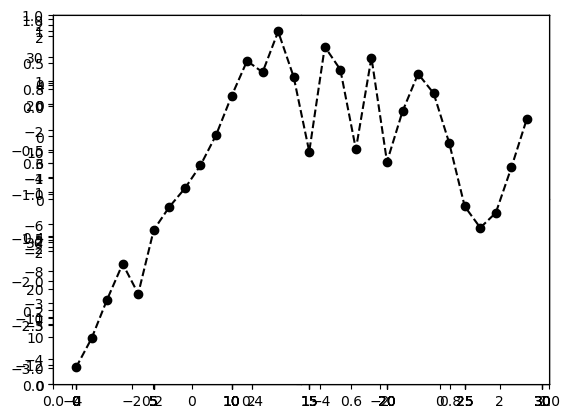

In [102]:
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", 
        linestyle="dashed", marker= "o")
fig

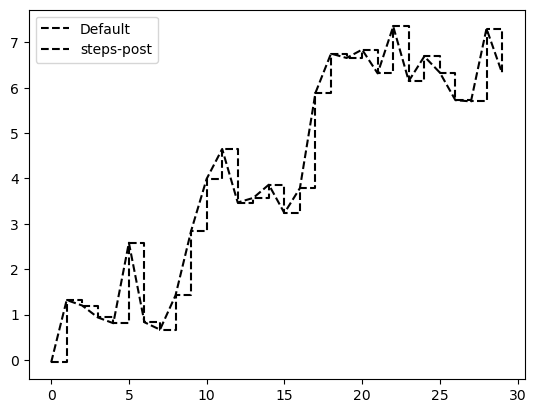

In [106]:
fig = plt.figure()
ax= fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black",linestyle="dashed", label= "Default")
ax.plot(data, color="black", linestyle= "dashed", 
        drawstyle="steps-post", label="steps-post")
ax.legend()
fig

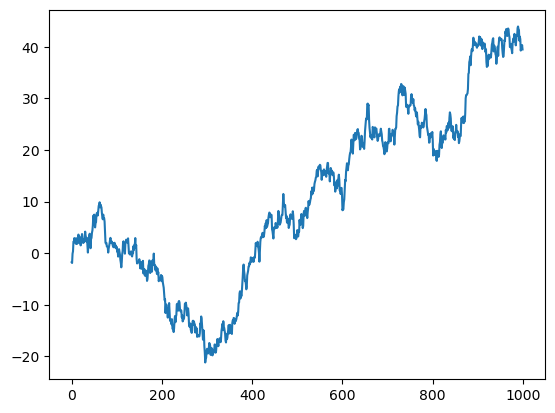

In [112]:
fig,ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
fig

In [114]:
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(["one","two","three","four","five"],
                            rotation=30, fontsize=8)

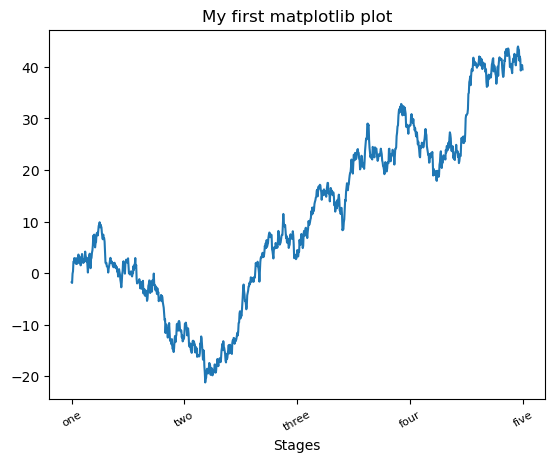

In [124]:
ax.set(title ="My first matplotlib plot", xlabel="Stages")
fig

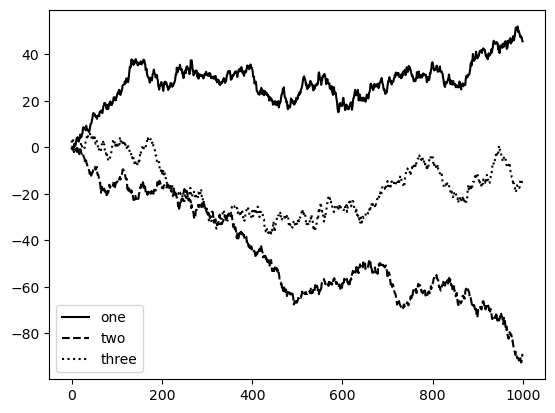

In [132]:
fig, ax = plt.subplots()
ax.plot(np.random.randn(1000).cumsum(), color="black",label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black",linestyle="dashed",label="two")
ax.plot(np.random.randn(1000).cumsum(), color="black",linestyle="dotted",label="three")
ax.legend()
fig

In [134]:
from datetime import datetime

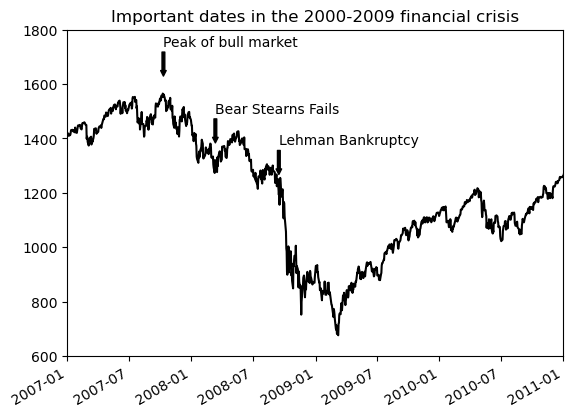

In [138]:
fig,ax=plt.subplots()
data=pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx=data["SPX"]
spx.plot(ax=ax,color="black")
crisis_data= [
    (datetime(2007,10,11), "Peak of bull market"),
    (datetime(2008,3,12), "Bear Stearns Fails"),
    (datetime(2008,9,15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) +75),
                xytext=(date,spx.asof(date)+225),
                arrowprops=dict(facecolor="black", headwidth=4, width=2,
                                headlength=4),
                horizontalalignment="left", verticalalignment= "top")

ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600,1800])

ax.set_title("Important dates in the 2000-2009 financial crisis")

fig

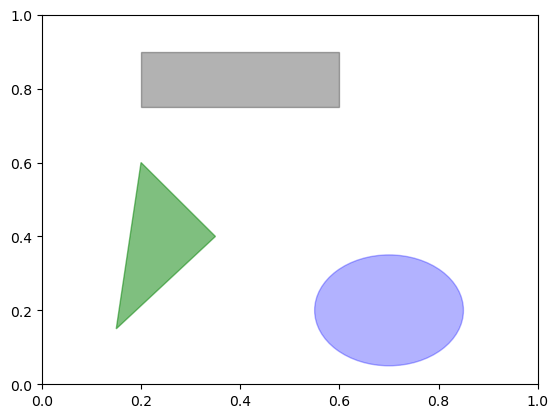

In [142]:
fig,ax=plt.subplots()
rect= plt.Rectangle((0.2,0.75), 0.4, 0.15, color="black", alpha=0.3)
circ= plt.Circle((0.7,0.2),0.15,color="blue", alpha=0.3)
pgon= plt.Polygon([[0.15,0.15], [0.35,0.4], [0.2,0.6]], 
                  color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

fig

In [144]:
fig.savefig("figpath.svg",dpi=400)

In [146]:
plt.rc("figure", figsize=(10,10))

In [150]:
plt.rc("font",family="monospace",weight="bold", size=8)

#### 판다스에서 시본으로 그래프 그리기

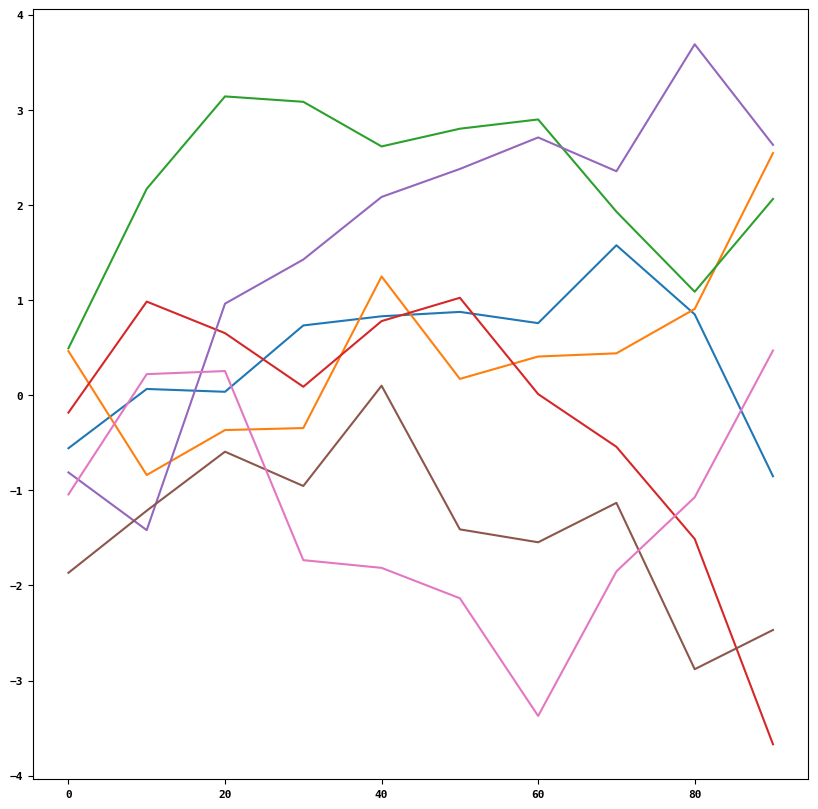

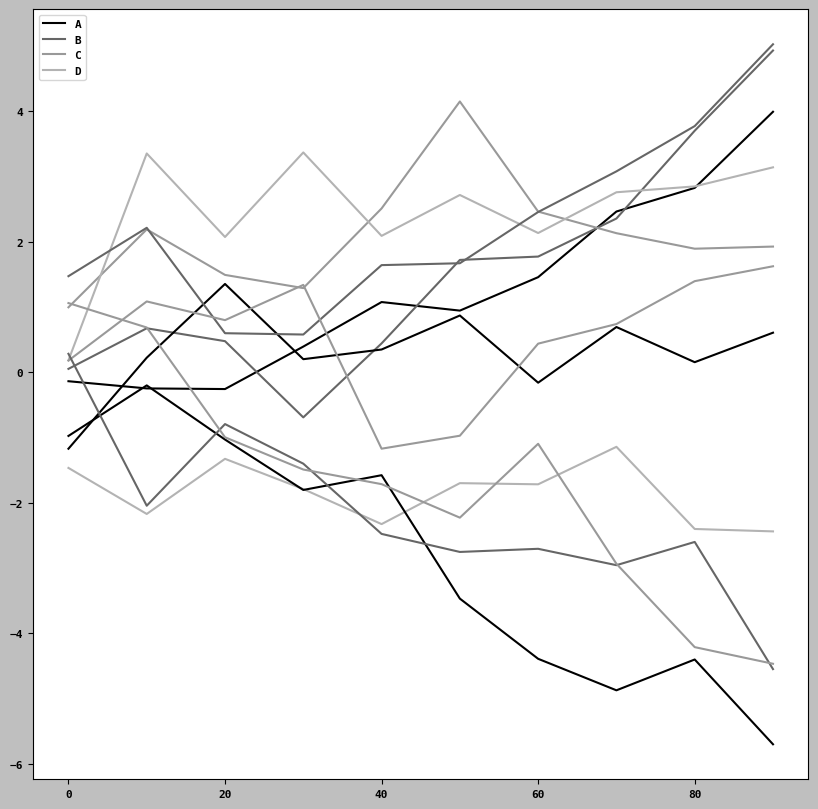

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [195]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index = np.arange(0,100,10))
s.plot()
plt.show(s)

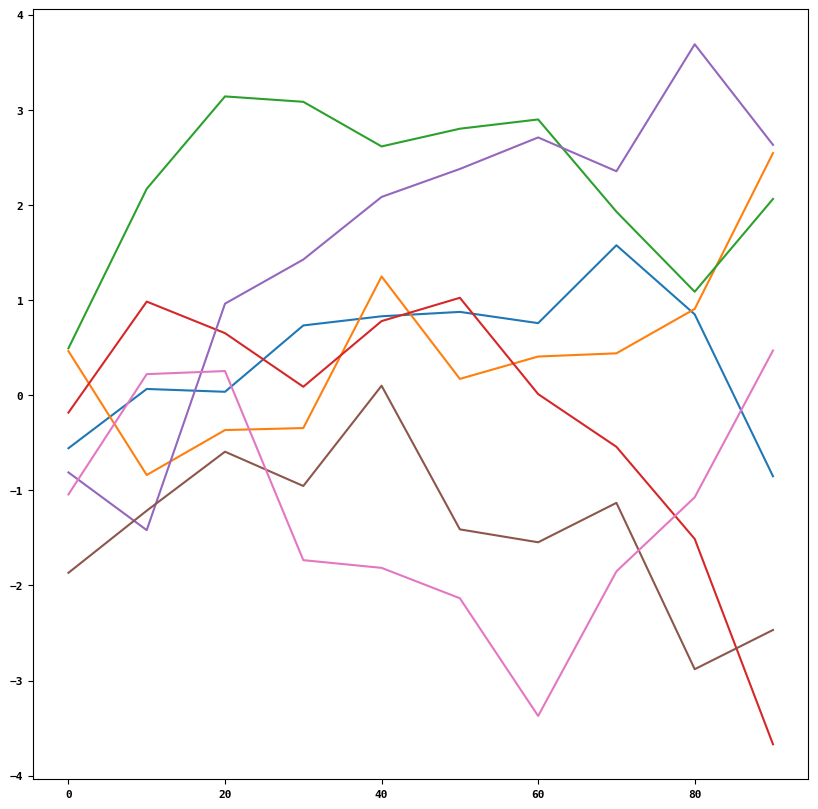

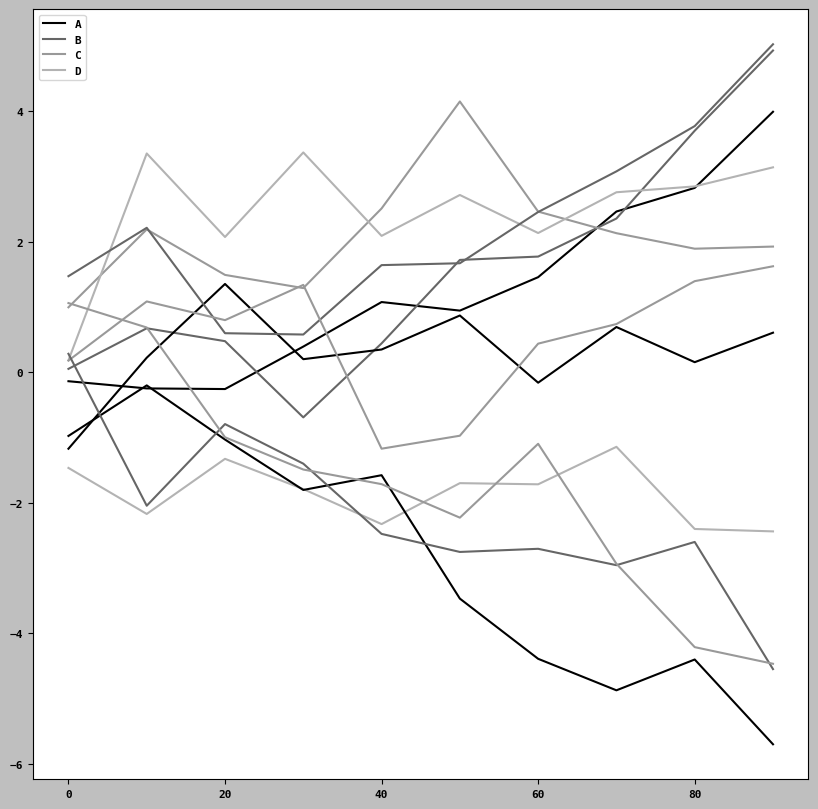

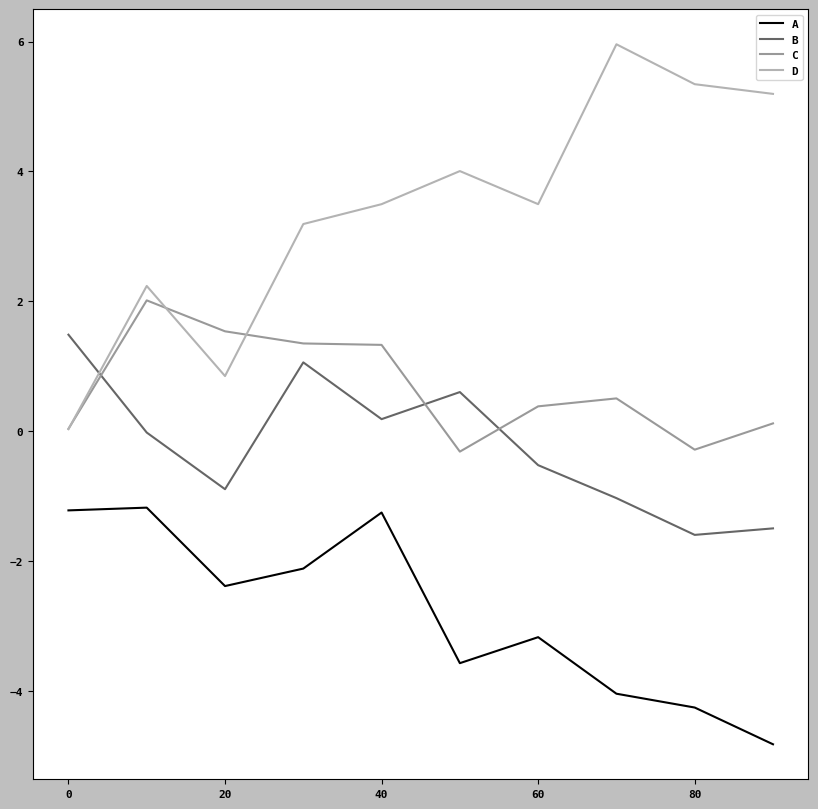

In [197]:
df = pd.DataFrame(np.random.standard_normal((10,4)).cumsum(0),
                  columns=["A","B","C","D"],
                  index=np.arange(0,100,10))

plt.style.use('grayscale')
df.plot()
plt.show()

In [199]:
fig,axes = plt.subplots(2,1)
data=pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0],color="black",alpha=0.7)

<Axes: >

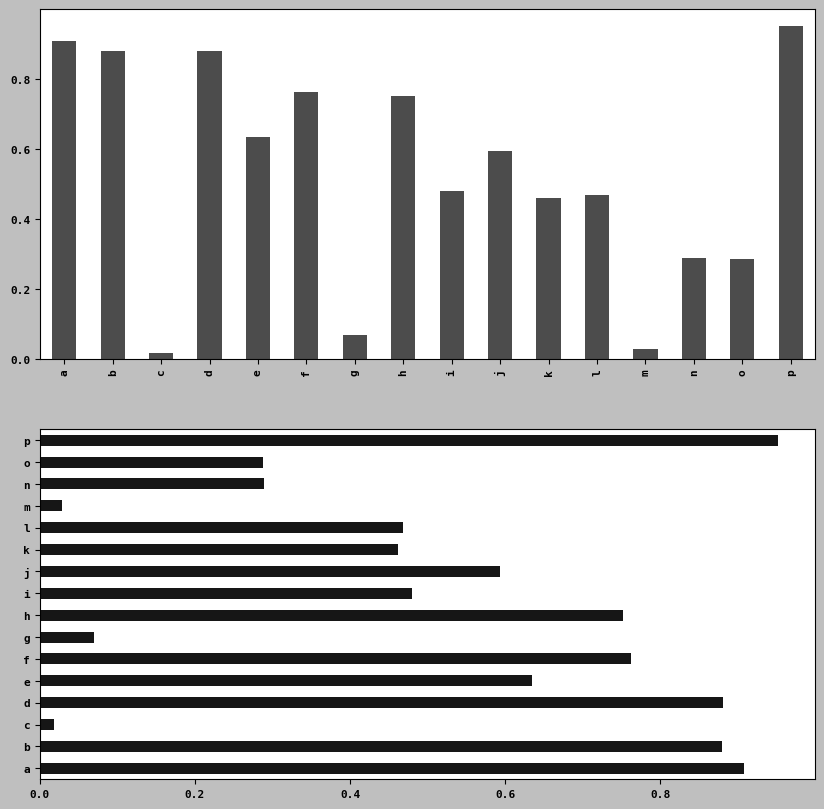

In [205]:
data.plot.barh(ax=axes[1], color="black", alpha=0.7)
plt.show()

In [211]:
df= pd.DataFrame(np.random.uniform(size= (6,4)),
                 index=["one","two","three","four","five", "six"],
                 columns= pd.Index(["A","B","C","D"], name="Genus"))
df

Genus,A,B,C,D
one,0.891519,0.484442,0.712970,0.116244
two,0.035800,0.336296,0.206103,0.138050
three,0.882602,0.534320,0.714726,0.859408
four,0.394827,0.143459,0.221146,0.659629
five,0.209320,0.591453,0.152868,0.879757
six,0.095838,0.576522,0.471973,0.991252


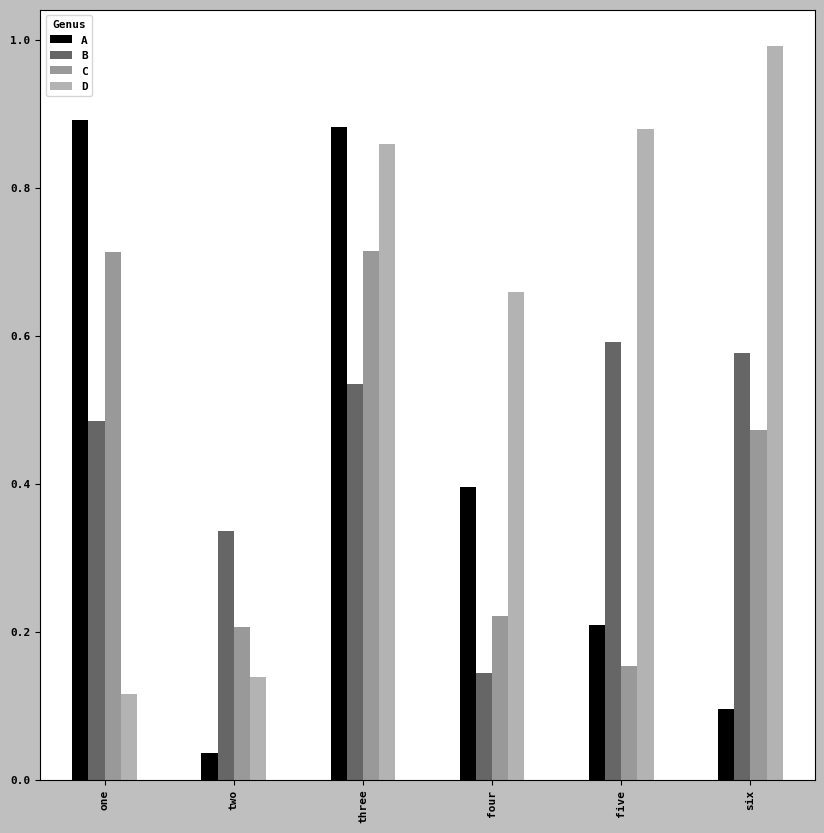

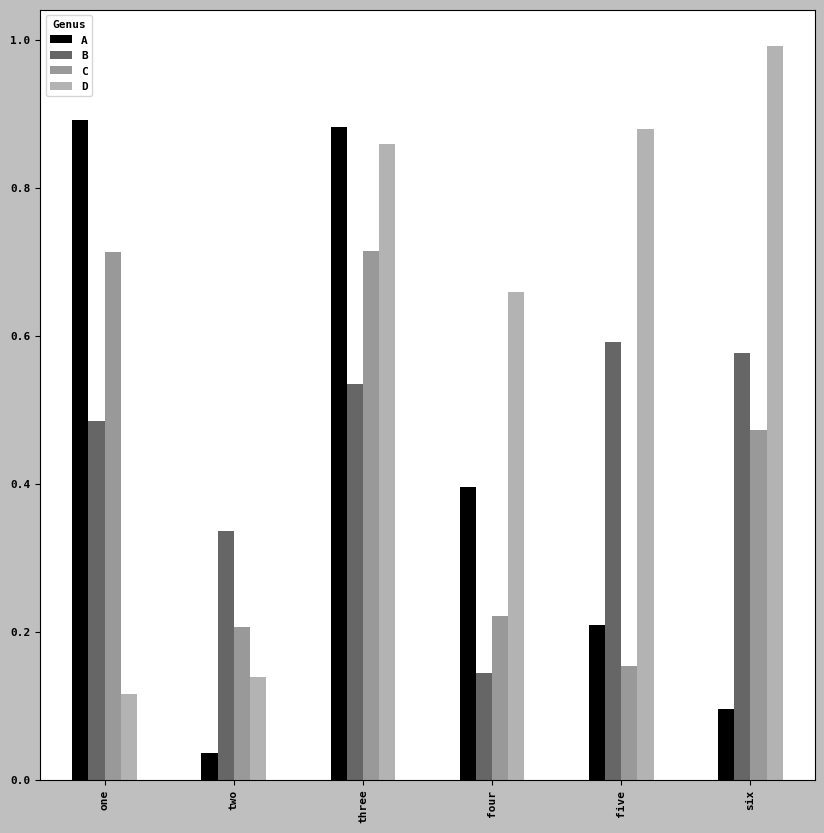

In [215]:
df.plot.bar()
plt.show()

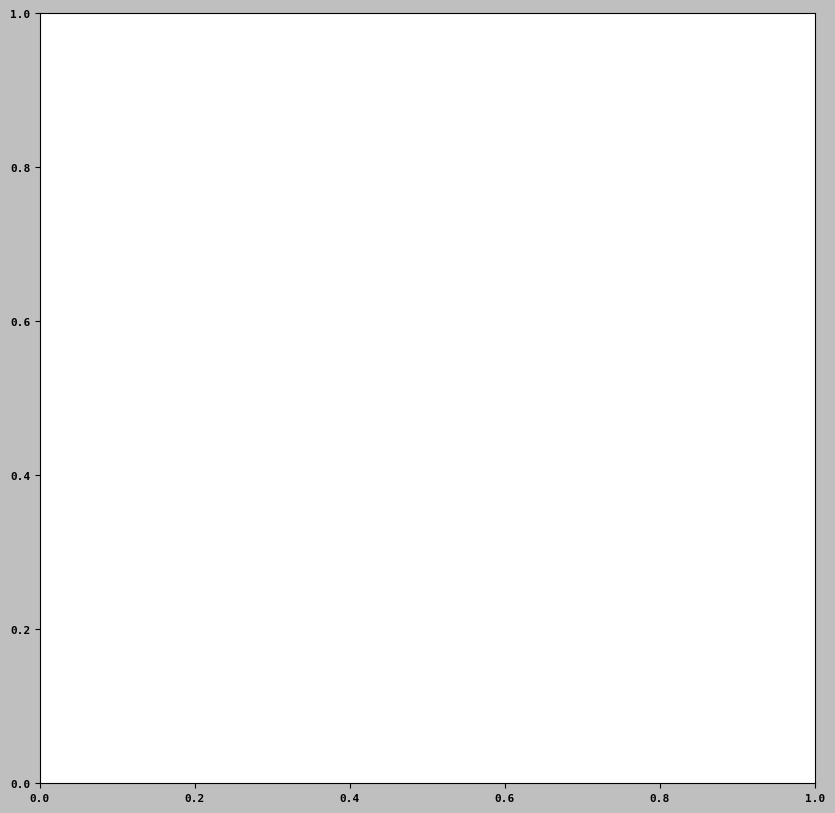

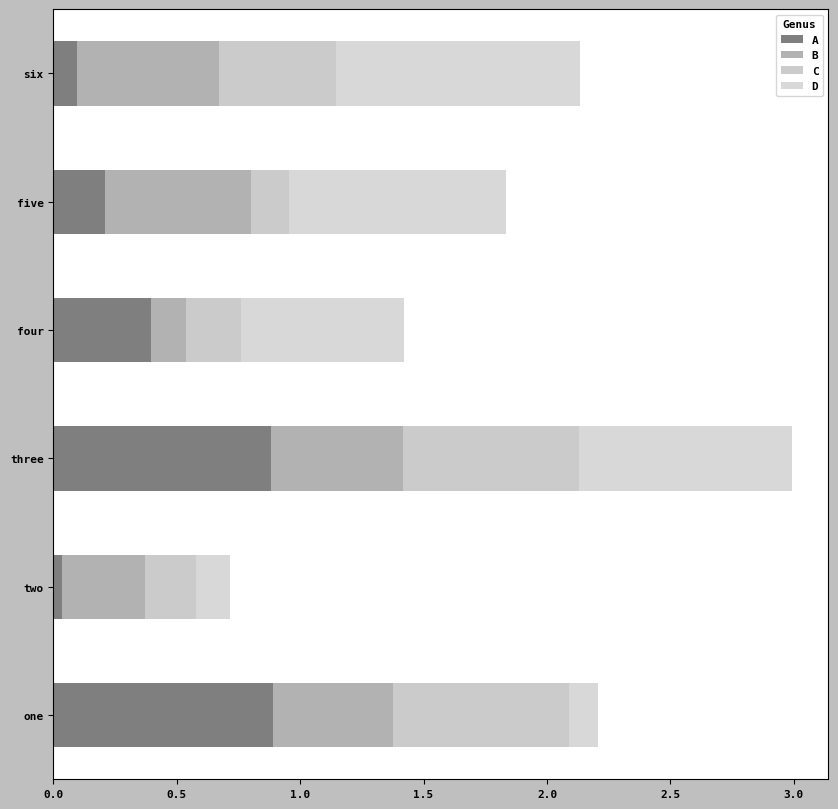

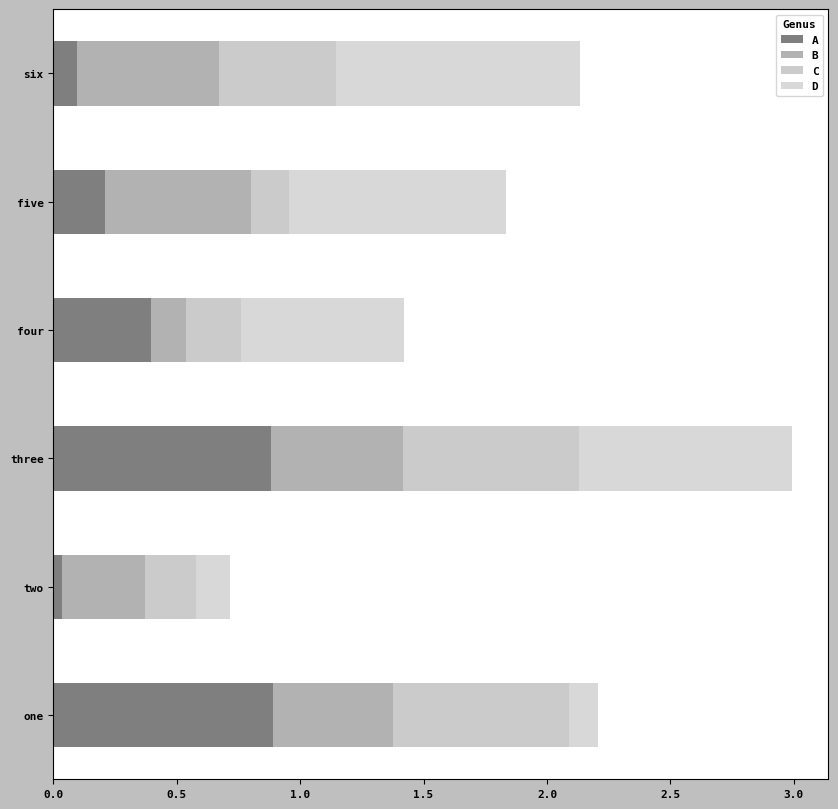

In [221]:
df.plot.barh(stacked=True, alpha=0.5)
plt.show()

In [223]:
tips=pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [225]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [227]:
party_counts = party_counts.loc[:, 2:5]

In [233]:
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


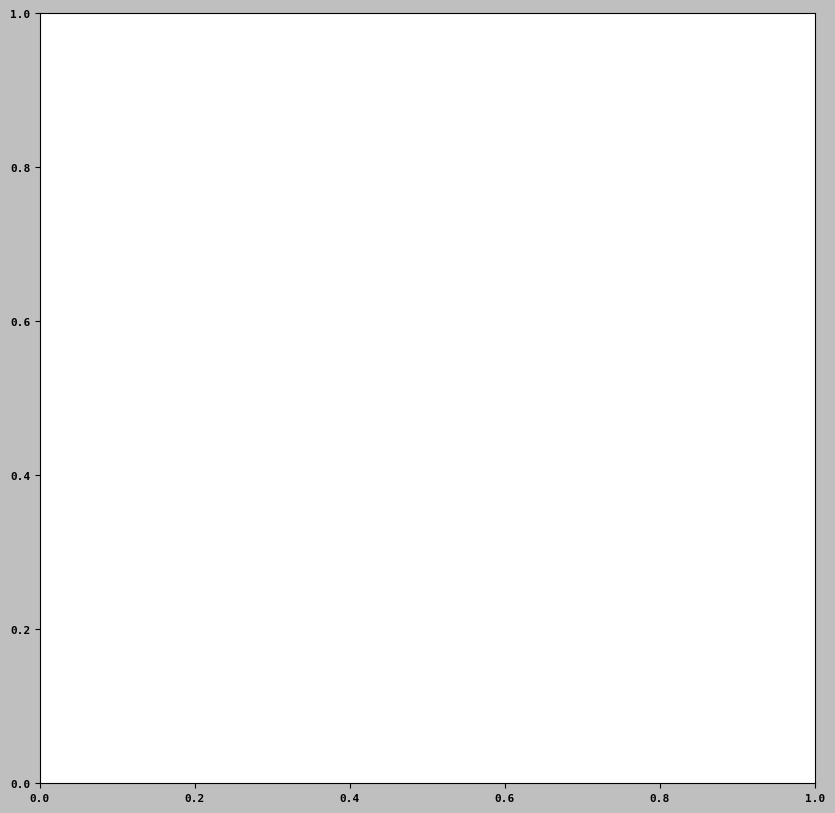

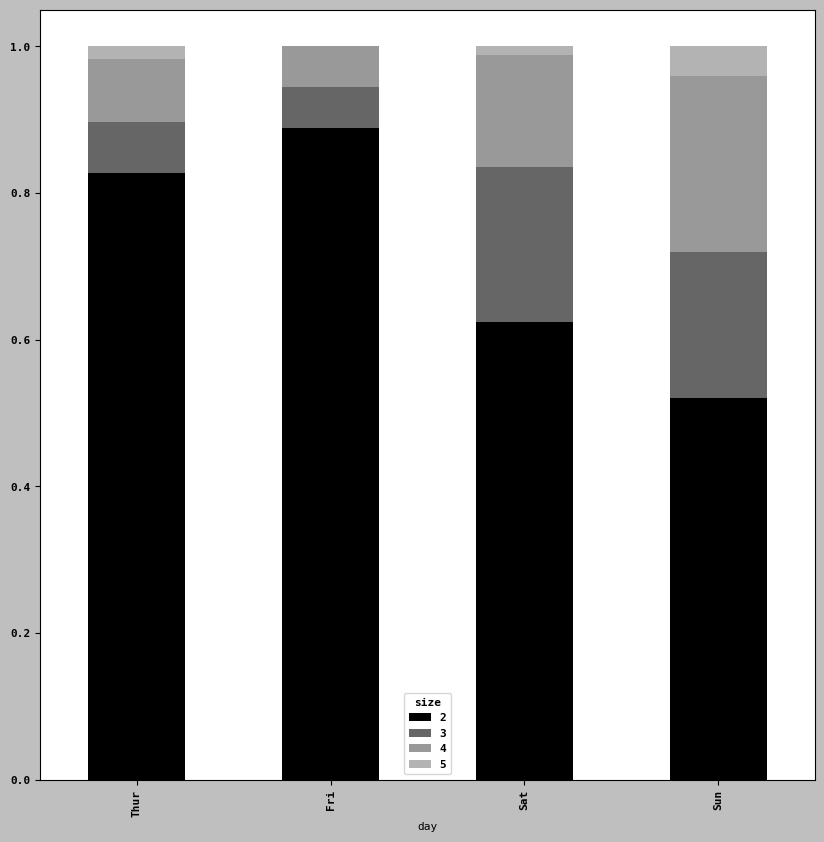

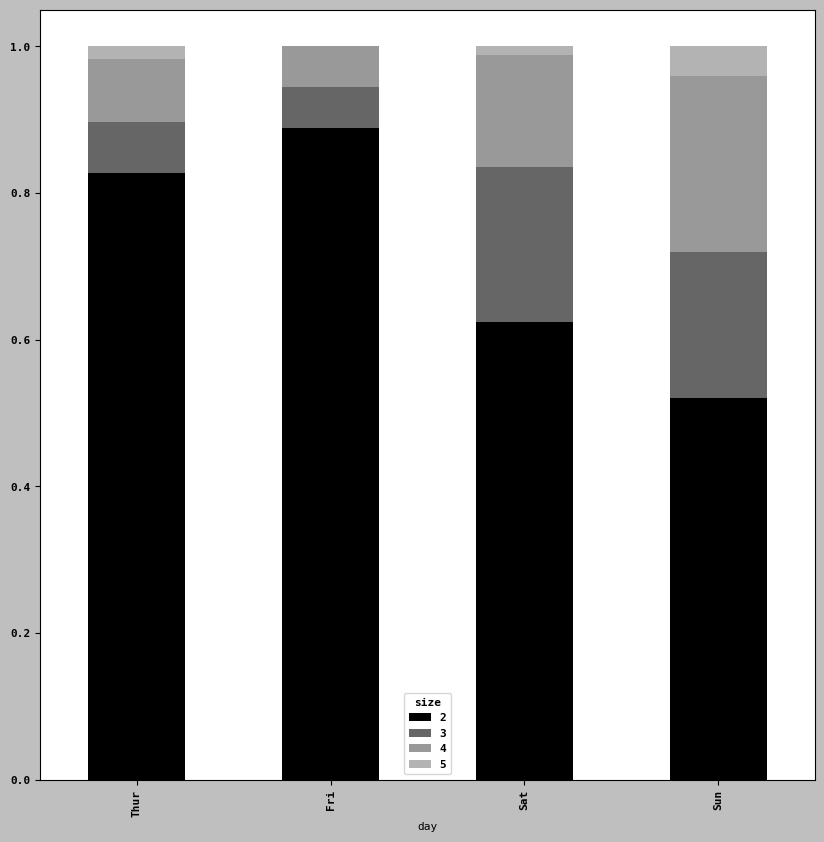

In [241]:
party_pcts.plot.bar(stacked=True)
plt.show()

In [243]:
import seaborn as sns

In [245]:
tips["tip_pct"] = tips["tip"]/(tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


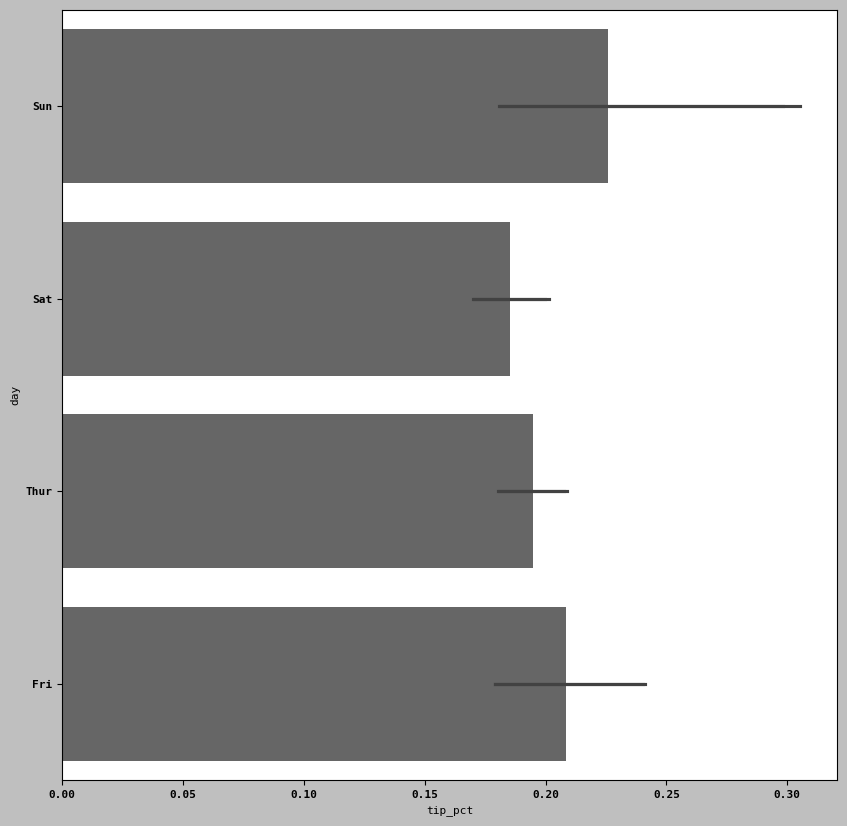

In [251]:
sns.barplot(x="tip_pct", y = "day", data=tips, orient="h")
plt.show()

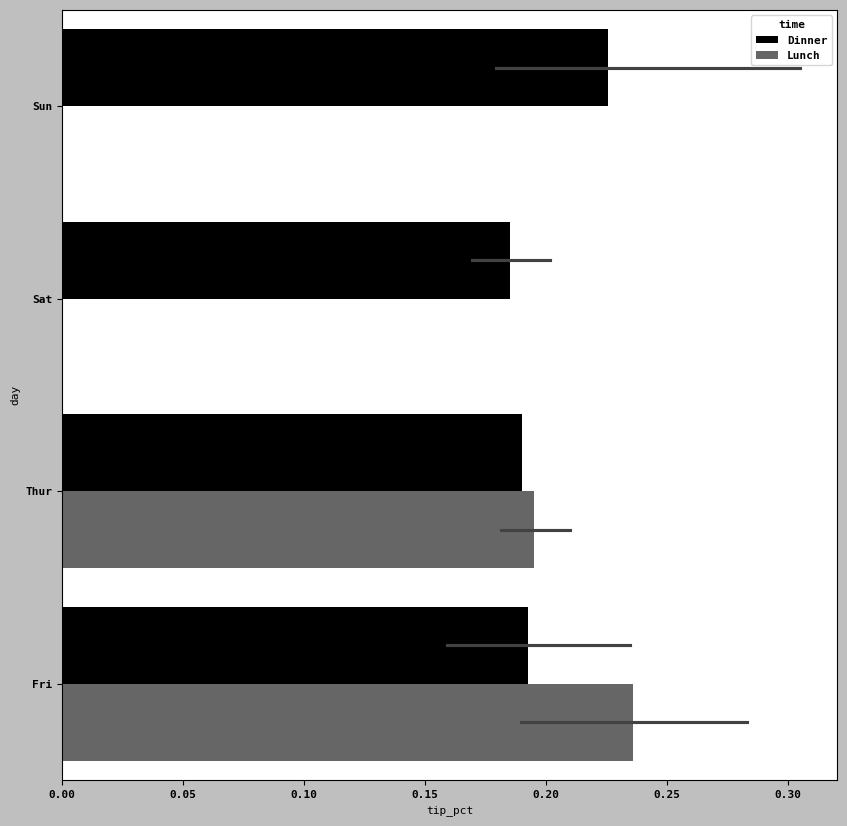

In [255]:
sns.barplot(x="tip_pct", y ="day", hue="time", data= tips, orient="h")
plt.show()

In [263]:
sns.set_style("whitegrid")
sns.set_palette("Greys_r")

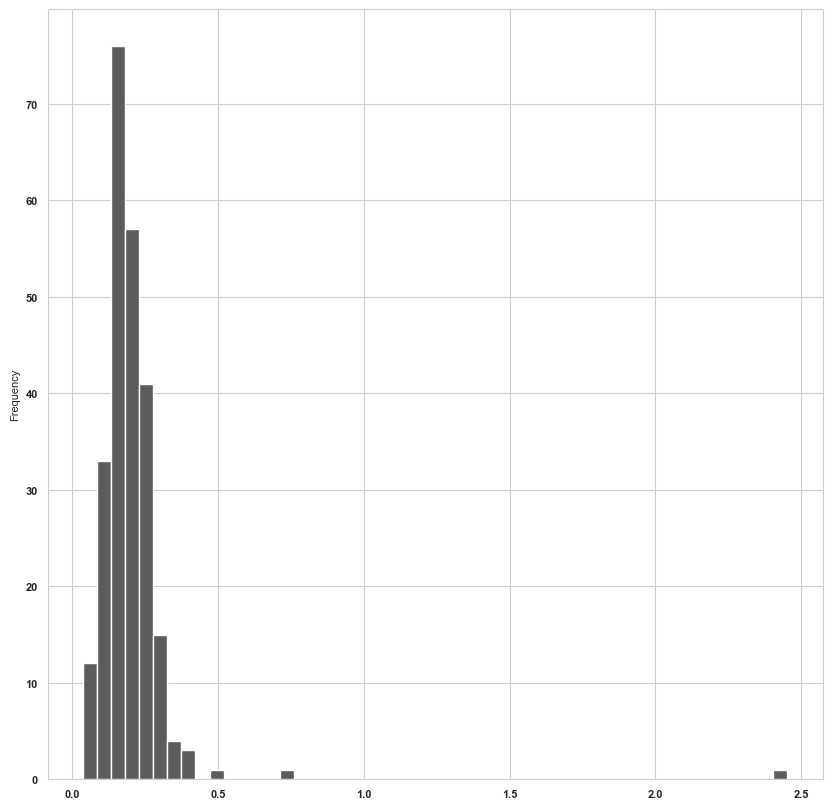

In [271]:
tips["tip_pct"].plot.hist(bins=50)
plt.show()

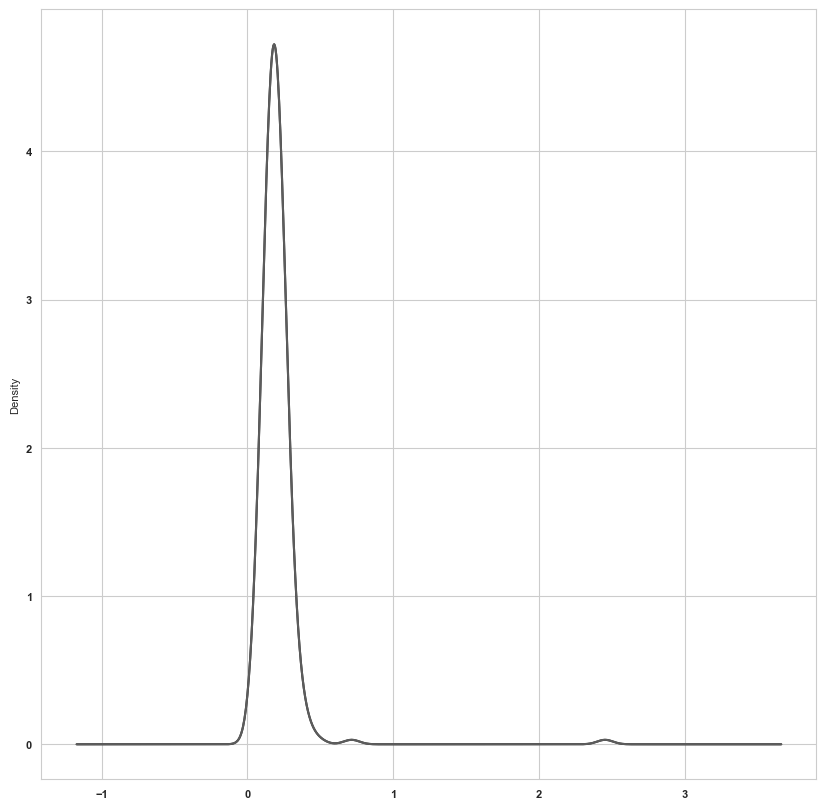

In [275]:
tips["tip_pct"].plot.density()
plt.show()

In [277]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


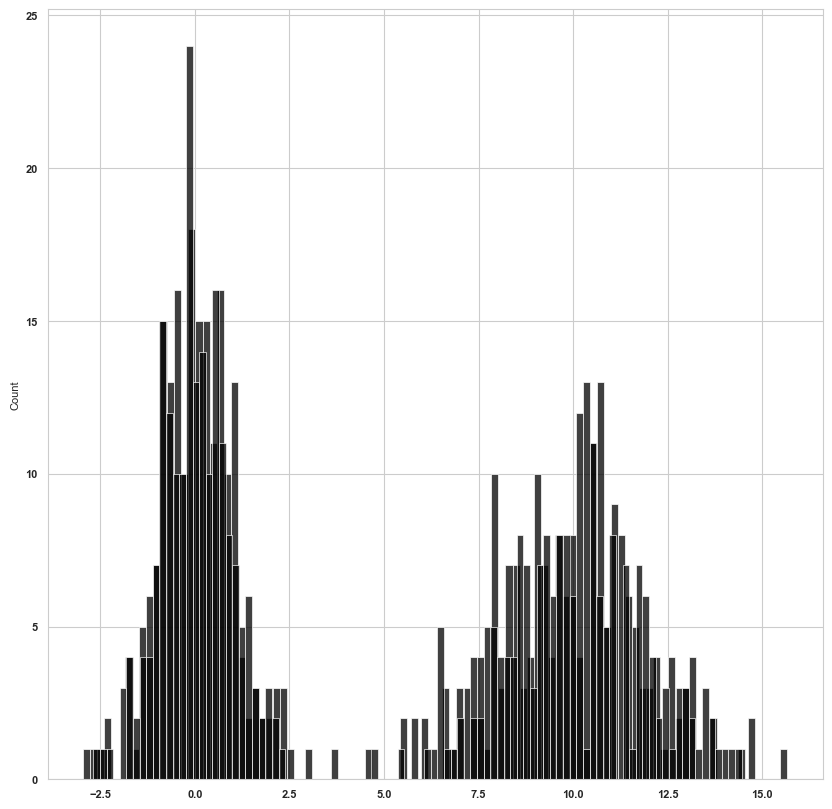

In [281]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color="black")
plt.show()

In [287]:
macro = pd.read_csv("macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


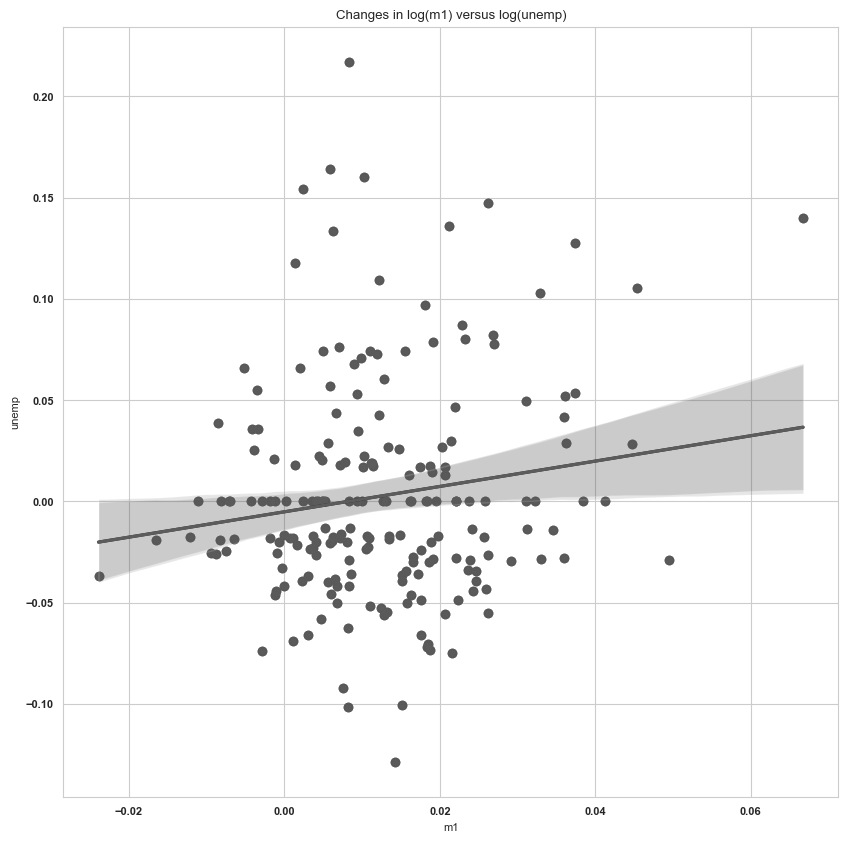

In [291]:
ax = sns.regplot(x="m1", y ="unemp", data = trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")
plt.show()

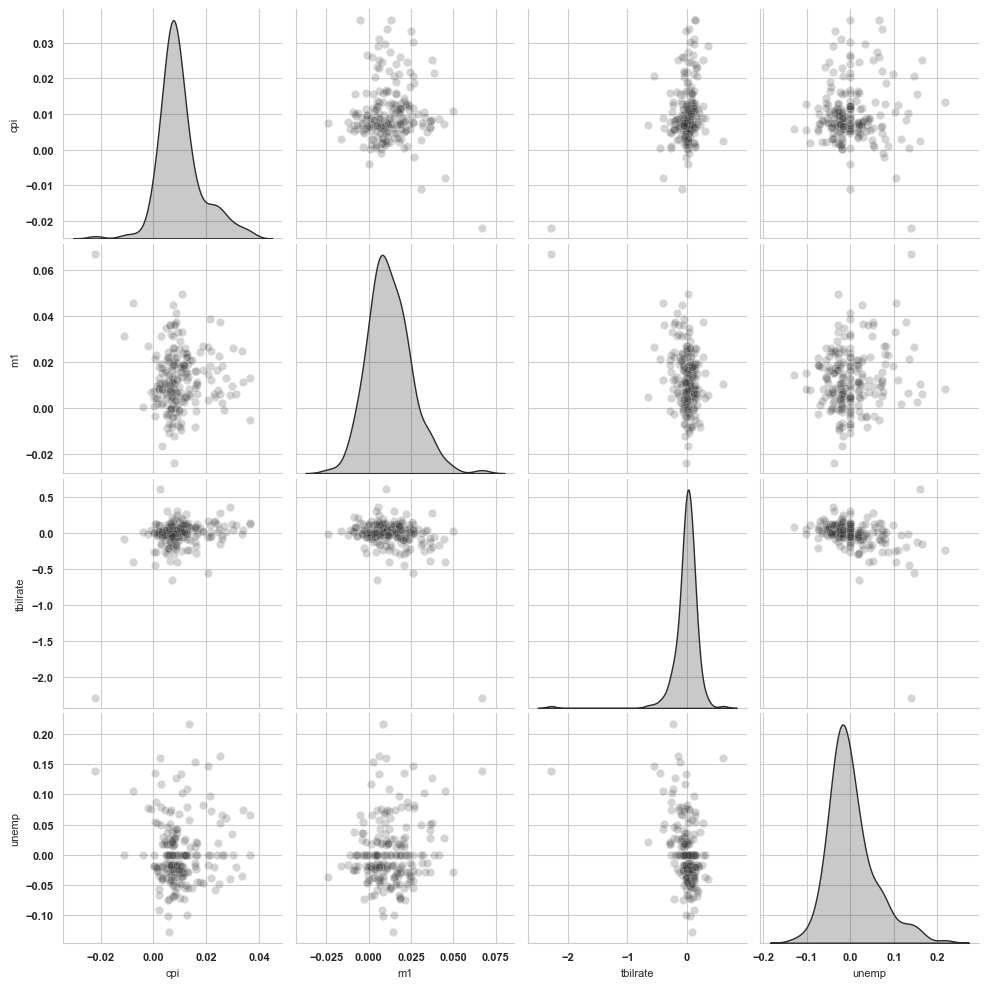

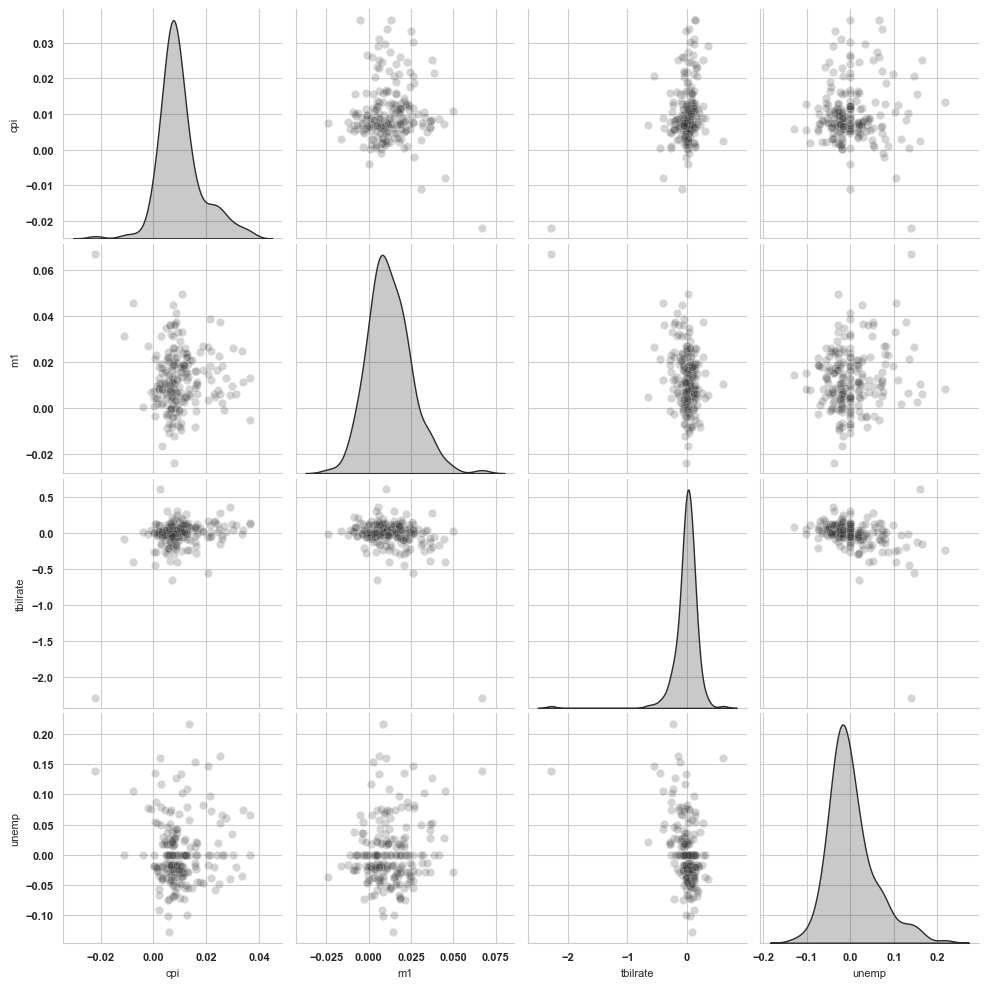

In [297]:
sns.pairplot(trans_data, diag_kind ="kde", plot_kws = {"alpha" : 0.2})
plt.show()

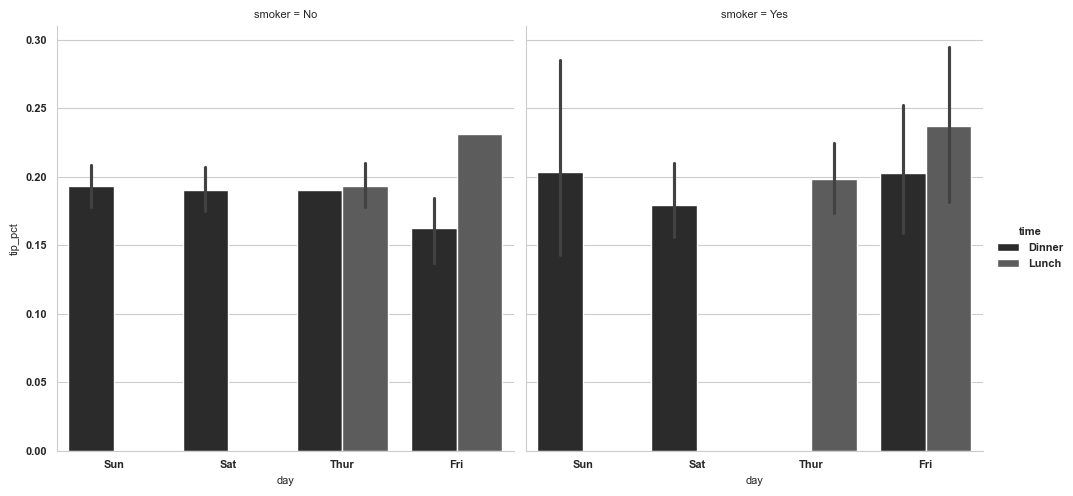

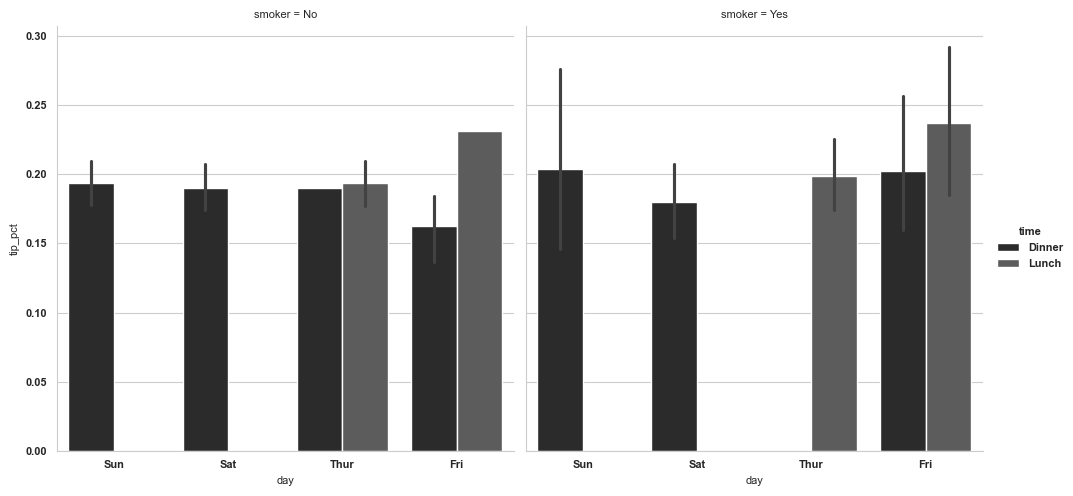

In [301]:
sns.catplot(x="day", y ="tip_pct", hue= "time", col = "smoker",
            kind = "bar", data = tips[tips.tip_pct <1])
plt.show()

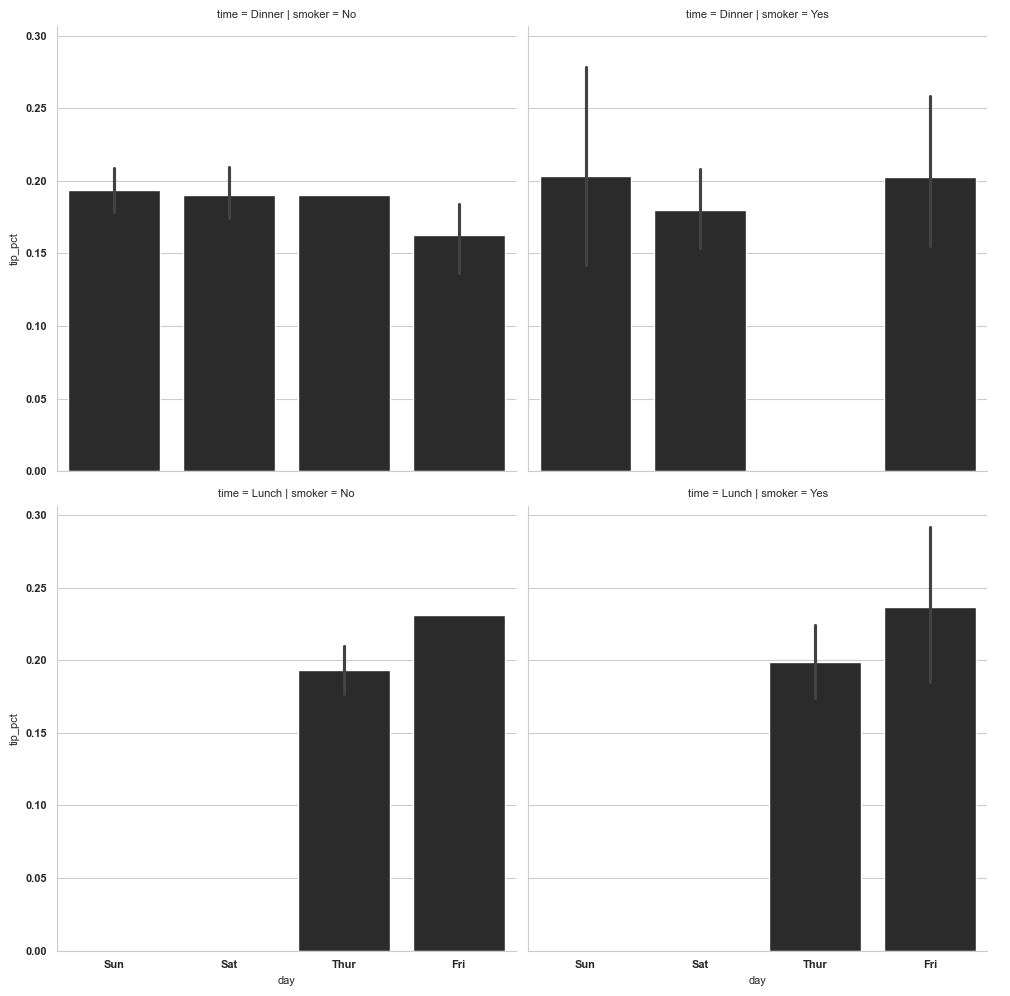

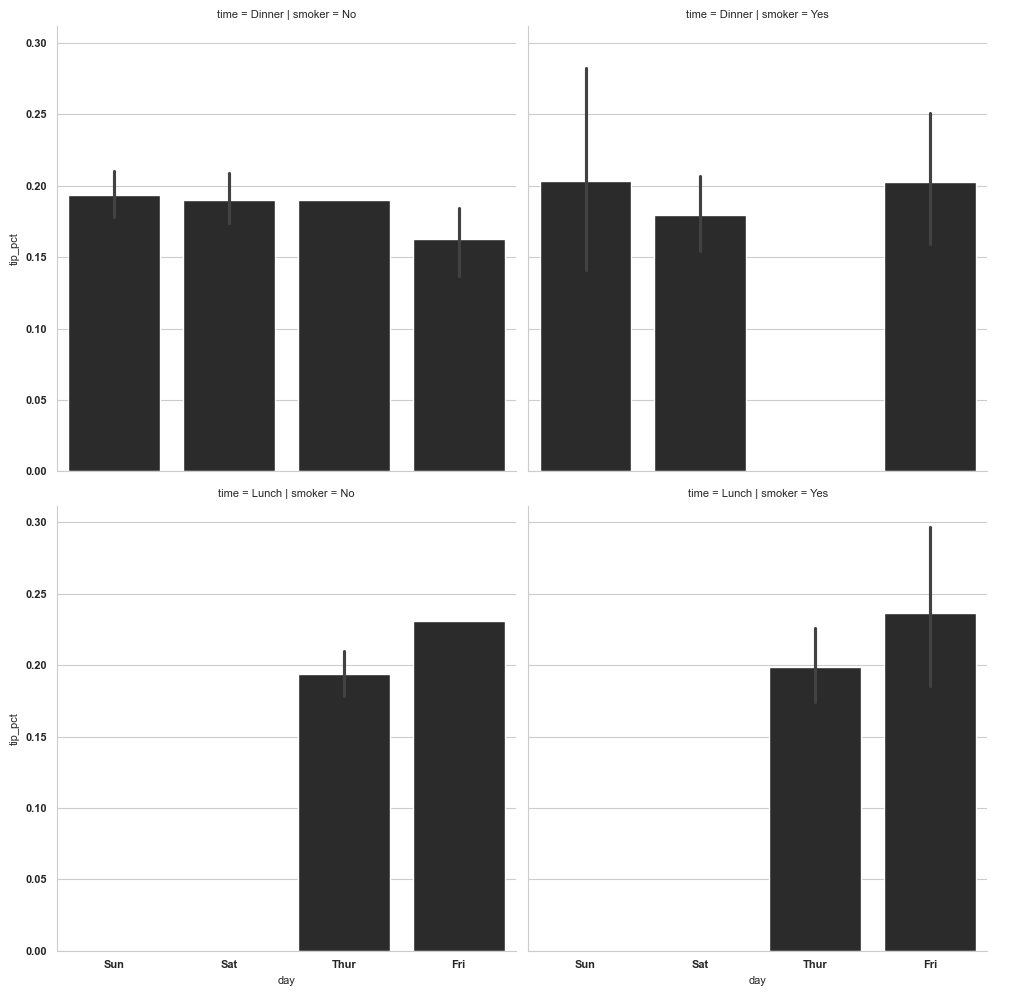

In [305]:
sns.catplot(x="day", y ="tip_pct", row="time", col ="smoker", kind= "bar", data= tips[tips.tip_pct < 1])
plt.show()

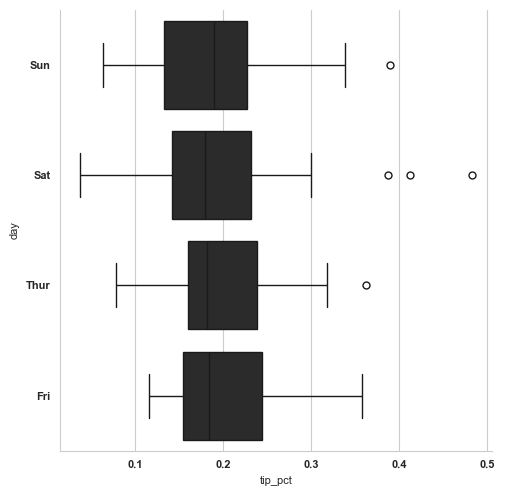

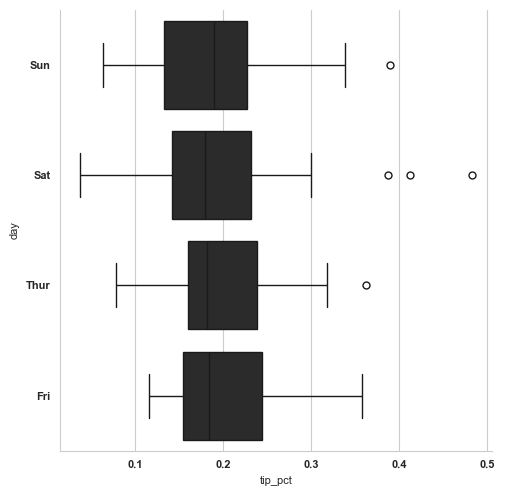

In [309]:
sns.catplot(x="tip_pct", y ="day", kind="box", data=tips[tips.tip_pct < 0.5])
plt.show()